## Exploring Regression Trees using [Wine Quality Data from UCI](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

#### Analysis follows Chapter 6 of *Machine Learning with R* by Brett Lantz (though of course here we use Python, not R)

#### Objective:  Use machine learning to determine the quality of wine based on chemistry data such as pH.    The analysis will use a regression tree, and the results compared to a neural network.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import itertools

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import Pipeline

from scipy.stats import pearsonr

from sklearn.tree import export_graphviz
import graphviz

warnings.filterwarnings("ignore")
%matplotlib

Using matplotlib backend: MacOSX


### 1. Import data into a pandas dataframe

In [2]:
data = pd.read_csv('winequality-white.csv', sep=';')

### 2. Basic data exploration

In [3]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.shape

(4898, 12)

In [5]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


(array([   20.,   163.,     0.,  1457.,     0.,  2198.,   880.,     0.,
          175.,     5.]),
 array([ 3. ,  3.6,  4.2,  4.8,  5.4,  6. ,  6.6,  7.2,  7.8,  8.4,  9. ]),
 <a list of 10 Patch objects>)

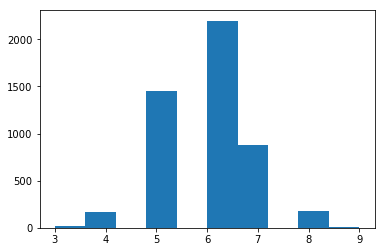

In [8]:
%matplotlib inline
plt.hist(data['quality'])

### 3. Create test and training sets

In [9]:
y = data['quality'].astype('float')
X = data.drop(labels = ['quality'], axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7234)

### 4. Train basic decision tree

Ok, let's start by following the exercise in Lantz:
- train a decision tree using variance reduction (the default parameter)
- check the correlation between the predictions and the test data

In [11]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [12]:
print('correlation =', pearsonr(predictions, y_test)[0])

correlation = 0.481946549032


In [13]:
print('R2 score =', model.score(X_test, y_test))

R2 score = -0.0656675437593


In [14]:
error = np.abs(predictions - y_test)
print('Average error = ', np.sum(error)/len(error))

Average error =  0.5374149659863946


Visualize tree:

In [15]:
export_graphviz(model, out_file="mytree.dot", feature_names = X_train.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
#uncomment to view graph inline
#graphviz.Source(dot_graph)

Too big...let's try limiting the depth to get something readable:

In [16]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [17]:
print('correlation =', pearsonr(predictions, y_test)[0])
print('R2 score =', model.score(X_test, y_test))
error = np.abs(predictions - y_test)
print('Average error = ', np.sum(error)/len(error))

correlation = 0.528866520345
R2 score = 0.279673165566
Average error =  0.5984705064760737


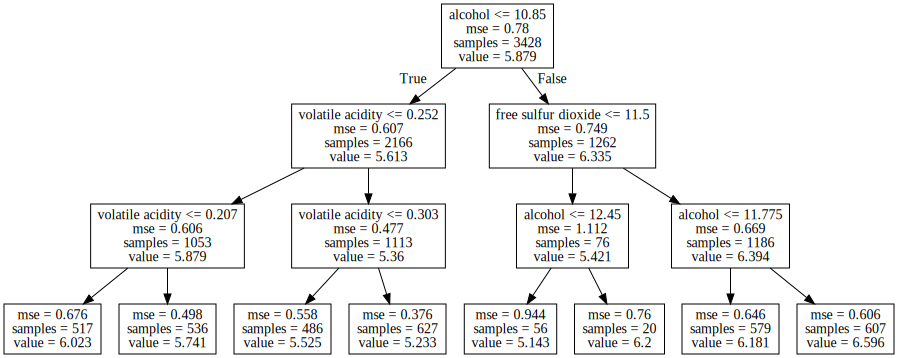

In [18]:
export_graphviz(model, out_file="mytree.dot", feature_names = X_train.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 5. Vary parameters to optimize R2 score

Well, that's not that bad.  Let's create a pipelines and try varying the parameters to see if we can do better:
- different split criteria
- different depths
- different minimum # of samples at a node to split


In [19]:
def GridSearchCV_results( scaler_list, classifier_list, X, y, score ):
    '''
    Runs the GridSearchCV function on given inputs
    Output: dictionary where key = tuple of parameters, value = score
    '''
    results = {}

    for s in scaler_list:
        for c in classifier_list:
        
            pipeline = Pipeline([ (s[0], s[1]), (c[0], c[1]) ])

            parameters = {}
            parameters.update(s[2])
            parameters.update(c[2])

            grid_search = GridSearchCV(pipeline, parameters, scoring=score, verbose=0, n_jobs=4)

            results[(s[0], c[0])] = grid_search.fit(X,y)
    return results
    

In [20]:
scaler_list = [
    ('std', StandardScaler(), {})
]
classifier_list = [
    ('dtr', DecisionTreeRegressor(), 
    {'dtr__criterion': ('mse', 'mae', 'friedman_mse'),        
    'dtr__min_samples_split':(2, 10, 50, 100, 500),
    'dtr__max_depth':(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)})
]
results = GridSearchCV_results( scaler_list, classifier_list, X_train, y_train, score = 'r2' )

In [21]:
res = pd.DataFrame(results[('std', 'dtr')].cv_results_)
res.sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_dtr__criterion,param_dtr__max_depth,param_dtr__min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
132,0.008825,0.000760,0.283498,0.446657,friedman_mse,7,50,"{'dtr__min_samples_split': 50, 'dtr__max_depth...",1,0.267819,0.470736,0.288884,0.425424,0.293800,0.443810,0.000134,0.000008,0.011269,0.018608
32,0.009299,0.001181,0.282809,0.446657,mse,7,50,"{'dtr__min_samples_split': 50, 'dtr__max_depth...",2,0.267819,0.470736,0.291287,0.425424,0.289326,0.443810,0.000322,0.000623,0.010632,0.018608
133,0.008739,0.000738,0.280310,0.415123,friedman_mse,7,100,"{'dtr__min_samples_split': 100, 'dtr__max_dept...",3,0.265054,0.430012,0.285212,0.402713,0.290674,0.412643,0.000307,0.000051,0.011018,0.011282
21,0.007662,0.000789,0.279328,0.382962,mse,5,10,"{'dtr__min_samples_split': 10, 'dtr__max_depth...",4,0.266361,0.392182,0.280425,0.384573,0.291209,0.372131,0.000856,0.000013,0.010173,0.008265
147,0.016706,0.001003,0.279155,0.518443,friedman_mse,10,50,"{'dtr__min_samples_split': 50, 'dtr__max_depth...",5,0.261442,0.543345,0.300643,0.492224,0.275378,0.519760,0.004214,0.000438,0.016227,0.020891


There are optimal values for both max depth (7) and minimum samples to split (50) in the ranges we used.  Also, the default mean squared error seems to give the best results.  

Using these on the test data:

In [22]:
model = DecisionTreeRegressor(max_depth=7, min_samples_split=50, criterion='mse')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('correlation =', pearsonr(predictions, y_test)[0])
print('R2 score =', model.score(X_test, y_test))
error = np.abs(predictions - y_test)
print('Average error = ', np.sum(error)/len(error))

correlation = 0.528561412155
R2 score = 0.265714175695
Average error =  0.590162546869165


These values are all slightly lower than before, which is good for average error but bad otherwise.  The results don't seem particularly sensitive to varying these parameters.

### 6. Compare with neural network

Let's use brute force to find an optimal net by varying the following parameters:
- data scaler
- number/size of hidden layers
- hidden layer activation function
- optimization algorithm
- L2 regularization (alpha)

In [23]:
scaler_list = [
    ('mm', MinMaxScaler(), {})
    ,('std', StandardScaler(), {})

]
classifier_list = [
    ('mlp', MLPRegressor(), {'mlp__hidden_layer_sizes': ((30,),(30, 30), (40,),(40, 40), (50,),(50, 50),
                                                        (60,),(60, 60),(70,),(70, 70),(80,), (80, 80),
                                                        (90,),(90, 90),(100,),(100, 100)),        
     'mlp__activation':('logistic','relu','identity','tanh'),
     'mlp__solver':('lbfgs','sgd','adam'),
    'mlp__alpha':(1.0e-4,1.0e-3,1.0e-2,1.0e-1,1.0, 1.0e+1, 1.0e+2)})
]

mlp_results = GridSearchCV_results( scaler_list, classifier_list, X_train, y_train, score = 'r2' )
    

In [24]:
mm_mlp_res = pd.DataFrame(mlp_results[('mm', 'mlp')].cv_results_)
mm_mlp_res.sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_mlp__activation,param_mlp__alpha,param_mlp__hidden_layer_sizes,param_mlp__solver,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
369,3.413587,0.003272,0.372380,0.426219,relu,0.0001,"(80, 80)",lbfgs,"{'mlp__hidden_layer_sizes': (80, 80), 'mlp__al...",1,0.368164,0.427106,0.364093,0.422060,0.384893,0.429491,0.109915,0.000109,0.008999,0.003098
465,2.978877,0.004145,0.367368,0.419691,relu,0.01,"(80, 80)",lbfgs,"{'mlp__hidden_layer_sizes': (80, 80), 'mlp__al...",2,0.362563,0.431733,0.356295,0.416247,0.383260,0.411092,0.124913,0.000644,0.011520,0.008771
1065,1.352990,0.002807,0.366618,0.392653,tanh,0.001,"(40, 40)",lbfgs,"{'mlp__hidden_layer_sizes': (40, 40), 'mlp__al...",3,0.358368,0.406590,0.364644,0.388161,0.376851,0.383206,0.018213,0.000033,0.007673,0.010061
564,0.855062,0.001830,0.366187,0.422507,relu,1,"(90,)",lbfgs,"{'mlp__hidden_layer_sizes': (90,), 'mlp__alpha...",4,0.357367,0.429597,0.362098,0.425449,0.379108,0.412476,0.011536,0.000033,0.009334,0.007292
1113,1.423594,0.002822,0.366174,0.404427,tanh,0.01,"(40, 40)",lbfgs,"{'mlp__hidden_layer_sizes': (40, 40), 'mlp__al...",5,0.354112,0.408455,0.368445,0.403588,0.375973,0.401239,0.137658,0.000181,0.009067,0.003005


In [25]:
std_mlp_res = pd.DataFrame(mlp_results[('std', 'mlp')].cv_results_)
std_mlp_res.sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_mlp__activation,param_mlp__alpha,param_mlp__hidden_layer_sizes,param_mlp__solver,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
618,2.103442,0.003195,0.388236,0.513911,relu,10,"(100,)",lbfgs,"{'mlp__hidden_layer_sizes': (100,), 'mlp__alph...",1,0.375225,0.524493,0.397125,0.515550,0.392363,0.501690,0.069147,0.000858,0.009406,0.009381
621,6.968755,0.005710,0.387616,0.584501,relu,10,"(100, 100)",lbfgs,"{'mlp__hidden_layer_sizes': (100, 100), 'mlp__...",2,0.380077,0.599941,0.385606,0.576446,0.397173,0.577116,0.293158,0.000457,0.007122,0.010921
606,1.017012,0.001701,0.385267,0.508387,relu,10,"(80,)",lbfgs,"{'mlp__hidden_layer_sizes': (80,), 'mlp__alpha...",3,0.365591,0.516232,0.385069,0.501342,0.405157,0.507587,0.090481,0.000186,0.016152,0.006105
612,1.415655,0.001855,0.385047,0.508230,relu,10,"(90,)",lbfgs,"{'mlp__hidden_layer_sizes': (90,), 'mlp__alpha...",4,0.369838,0.516010,0.390129,0.508852,0.395183,0.499829,0.102860,0.000127,0.010953,0.006620
600,0.845570,0.001567,0.384585,0.496773,relu,10,"(70,)",lbfgs,"{'mlp__hidden_layer_sizes': (70,), 'mlp__alpha...",5,0.363069,0.502156,0.397042,0.505719,0.393651,0.482444,0.038095,0.000075,0.015280,0.010236


Using the best values on the test data:

In [26]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7234)
ZS = StandardScaler()
ZS.fit(X_train)
X_train_tr = ZS.transform(X_train)
X_test_tr = ZS.transform(X_test)

NN = MLPRegressor(hidden_layer_sizes=(100,), solver='lbfgs', alpha=10, activation='relu')
NN.fit(X_train_tr, y_train)
predictions = NN.predict(X_test_tr)
print('correlation =', pearsonr(predictions, y_test)[0])
print('R2 score =',NN.score(X_test_tr, y_test))
error = np.abs(predictions - y_test)
print('Average error = ', np.sum(error)/len(error))

correlation = 0.623060135927
R2 score = 0.387623401181
Average error =  0.5429155496538954


This is decent, and better than than the decision tree.  Visually, the points lie fairly close to the 45 degree line:

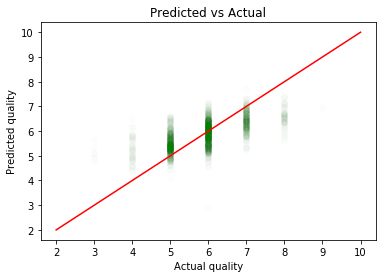

In [27]:
%matplotlib inline 
plt.scatter(y_test, predictions, marker='o', color='g', alpha = 0.01)
plt.plot((2,10),(2,10), color='r')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')
plt.title('Predicted vs Actual')
plt.show()

### 7. Conclusions

Both decision trees and neural nets do a decent job of predicting the wine quality.  With some parameter tuning, higher correlation (~.62) and lower average error (~54) can be achieved with the neural net.

